# Dog Breed Classifier

The goal of this project is to be able to classify different dog breeds the best we can. Let's import any packakes we think we'll need for now.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os, sys

/Users/meyern/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We notice that the data of the images are not the same size. In order to apply a Convolutional NN to this data, we need to resize the images to a common size. We will do 256 x 256 pixels.

In [3]:
PATH_TO_TRAIN = "/Users/meyern/Downloads/all/data/train/"
PATH_TO_TEST = "/Users/meyern/Downloads/all/data/test/"
img_size = (256,256)

# resize each image to 100x100 pixels
def resize(path_str, size):
    dirs = os.listdir(path_str)
    for item in dirs:
        if os.path.isfile(path_str+item):
            im = Image.open(path_str+item)
            f, e = os.path.splitext(path_str+item)
            imResize = im.resize(size, Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

In [4]:
resize(PATH_TO_TRAIN, img_size)
resize(PATH_TO_TEST, img_size)

In [5]:
labels = pd.read_csv('labels.csv')


def get_img_array(train = True):
    if train == True:
        s = (len(labels['breed']), 256, 256, 3)
        allImage = np.zeros(s)
        i=0
        for k in labels['id'].values:
            image = PIL.Image.open(PATH_TO_TRAIN+k+'.jpg')
            image = np.array(image)
            image = np.clip(image/255.0, 0.0, 1.0)
            i+=1
            allImage[i-1]=image
        return allImage
    else:
        s = (len(os.listdir(PATH_TO_TEST)), 256, 256, 3)
        allImage = np.zeros(s)
        i=0
        for j in os.listdir(PATH_TO_TEST):
            image = PIL.Image.open(PATH_TO_TEST+j)
            image = np.array(image)
            image = np.clip(image/255.0, 0.0, 1.0)
            i+=1
            allImage[i-1]=image
        return allImage

In [6]:
train_data = get_img_array(train=True)
test_data = get_img_array(train=False)
print("Train Shape: ", train_data.shape)
print("Test Shape: ", test_data.shape)

Train Shape:  (10222, 256, 256, 3)
Test Shape:  (10357, 256, 256, 3)


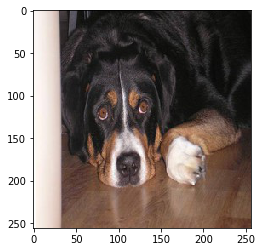

In [7]:
im = train_data[200,:,:,:]
plt.imshow(im)
plt.show()

In [162]:
from scipy.stats import itemfreq

TOP_N_DOGS = 8

def filter_main_dogs(top_n_dogs, all_breeds = 'TRUE'):
    label_freq = itemfreq(labels['breed'])
    label_freq = label_freq[label_freq[:, 1].argsort()[::-1]]
    if all_breeds == 'FALSE':
        main_dogs = label_freq[:,0][0:TOP_N_DOGS]
    else:
        main_dogs = label_freq[:,:][:]

    labels_matrix = labels['breed'].as_matrix()
    labels_matrix = labels_matrix.reshape(labels_matrix.shape[0],1)
    labels_filtered_index = np.where(labels_matrix == main_dogs)
    return labels_filtered_index

filter_main_dogs(TOP_N_DOGS,all_breeds='FALSE')



/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


(array([    9,    12,    57,    79,    80,    88,    90,   118,   122,
          141,   146,   161,   164,   165,   219,   223,   226,   229,
          230,   233,   235,   237,   238,   242,   262,   265,   268,
          271,   276,   288,   306,   310,   333,   351,   357,   360,
          362,   377,   392,   407,   408,   427,   451,   453,   480,
          486,   488,   489,   509,   510,   542,   546,   553,   555,
          568,   576,   588,   599,   613,   620,   625,   628,   654,
          686,   695,   697,   700,   723,   738,   744,   751,   763,
          777,   782,   783,   785,   802,   809,   828,   834,   860,
          871,   887,   893,   895,   913,   916,   932,   957,   976,
          980,  1014,  1047,  1062,  1068,  1103,  1124,  1127,  1140,
         1143,  1148,  1162,  1165,  1171,  1182,  1199,  1200,  1201,
         1206,  1223,  1230,  1238,  1243,  1260,  1294,  1309,  1310,
         1321,  1327,  1329,  1343,  1377,  1395,  1426,  1427,  1428,
      

In [163]:
filtered_labels = filter_main_dogs(TOP_N_DOGS, all_breeds='FALSE')
filtered_label_index = labels.iloc[filtered_labels[0],:]
train_filtered = train_data[filtered_labels[0],:,:,:]


/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


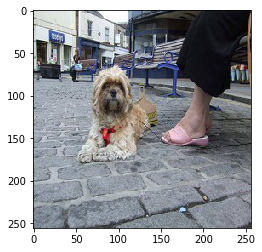

This is a(n) shih-tzu


In [165]:
# Scottish Deerhound
w=100
im = train_filtered[w,:,:,:]
plt.imshow(im)
plt.show()
print("This is a(n)", filtered_label_index['breed'].iloc[w])

In [166]:
label_values = filtered_label_index['breed'].values
label_values

array(['scottish_deerhound', 'maltese_dog', 'shih-tzu',
       'scottish_deerhound', 'entlebucher', 'entlebucher', 'maltese_dog',
       'bernese_mountain_dog', 'entlebucher', 'shih-tzu', 'afghan_hound',
       'scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog',
       'bernese_mountain_dog', 'bernese_mountain_dog', 'maltese_dog',
       'shih-tzu', 'great_pyrenees', 'scottish_deerhound',
       'scottish_deerhound', 'scottish_deerhound', 'maltese_dog',
       'afghan_hound', 'shih-tzu', 'bernese_mountain_dog', 'afghan_hound',
       'shih-tzu', 'great_pyrenees', 'bernese_mountain_dog',
       'bernese_mountain_dog', 'pomeranian', 'pomeranian',
       'bernese_mountain_dog', 'afghan_hound', 'shih-tzu',
       'scottish_deerhound', 'afghan_hound', 'great_pyrenees',
       'afghan_hound', 'pomeranian', 'afghan_hound', 'pomeranian',
       'maltese_dog', 'scottish_deerhound', 'bernese_mountain_dog',
       'entlebucher', 'scottish_deerhound', 'bernese_mountain_dog',
       'shih-

In [167]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(label_values)
labels_one_hot = le.transform(label_values)
print(labels_one_hot)
# print(list(le.inverse_transform(labels_one_hot)))

[6 4 7 6 2 2 4 1 2 7 0 6 4 1 1 1 4 7 3 6 6 6 4 0 7 1 0 7 3 1 1 5 5 1 0 7 6
 0 3 0 5 0 5 4 6 1 2 6 1 7 0 2 4 2 0 3 2 6 4 7 2 7 6 3 4 0 4 4 1 0 3 6 1 6
 0 7 5 3 7 2 3 4 7 0 5 6 4 1 2 5 5 6 2 6 1 0 4 7 3 0 7 5 4 3 7 3 0 1 3 2 1
 1 1 6 3 3 4 3 3 1 2 1 6 3 1 1 6 4 0 2 2 1 5 7 0 6 5 2 5 5 1 6 7 5 0 7 0 2
 4 1 7 1 6 7 3 2 6 7 0 5 4 2 5 7 0 5 4 3 0 3 7 2 5 2 4 6 5 3 5 2 5 5 5 4 5
 2 3 6 6 2 7 4 0 1 4 4 2 4 2 6 1 6 3 3 6 1 4 3 4 3 4 1 5 0 6 4 4 6 4 6 0 3
 1 4 6 6 0 2 7 4 7 6 1 3 1 4 7 1 4 5 7 0 2 7 6 6 5 0 7 1 1 6 4 4 3 0 1 3 2
 5 3 1 4 6 4 4 2 3 5 5 5 3 0 1 0 6 1 4 3 0 2 4 5 5 3 4 0 4 1 7 7 4 4 4 0 5
 5 4 1 1 5 6 3 0 0 2 1 2 4 0 7 7 1 5 2 7 2 0 6 4 0 5 4 1 4 6 2 7 2 3 5 3 5
 2 7 7 2 5 4 4 1 2 6 5 6 2 0 6 2 4 2 1 5 1 3 6 0 3 5 4 4 3 2 5 0 5 2 6 6 5
 2 1 3 2 5 3 5 5 3 2 4 0 4 6 5 7 6 2 3 5 7 2 7 0 5 4 3 1 3 6 4 6 0 2 0 1 6
 2 0 6 3 2 6 3 4 0 2 3 6 0 0 7 3 0 1 6 6 3 1 1 4 6 2 5 5 0 0 5 0 7 5 5 2 0
 0 1 6 0 1 5 6 6 6 5 7 1 6 4 0 7 7 6 3 6 0 7 6 5 3 7 6 6 0 5 1 6 6 4 5 3 6
 7 0 4 6 5 5 2 5 5 7 6 5 

# Apply a Convolutional Neural Network to the data

In [181]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

channels = 3
img_dim = 256
n_outputs = TOP_N_DOGS
conv1_filters = 32
conv1_stride = 1
conv1_ksize = 5

conv2_filters = 64
conv2_stride = 1
conv2_ksize = 5

conv3_filters = 128
conv3_stride = 1
conv3_ksize = 5

conv1_pad = 'SAME'
conv2_pad = 'SAME'
conv3_pad = 'SAME'

conv2_dropout_rate = 0.2
conv1_dropout_rate = 0.2
conv3_dropout_rate = 0.2
pool3_filter_maps = conv2_filters

n_fc1 = 500
fc1_dropout_rate = 0.3

In [191]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, img_dim, img_dim, channels], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, img_dim, img_dim, channels])
    y = tf.placeholder(tf.int32, name = 'y', shape=[None])
    training = tf.placeholder_with_default(False, shape=[], name = "training")
    
conv1 = tf.layers.conv2d(X_reshaped,
                         activation=tf.nn.relu, 
                         filters=conv1_filters, 
                         strides=conv1_stride, 
                         padding=conv1_pad, 
                         kernel_size = conv1_ksize, 
                         name='conv1')


with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
#     pool2_flatten = tf.reshape(pool2, shape=[-1, 32*32*pool3_filter_maps])
#     pool2_flat_drop = tf.layers.dropout(pool2_flatten, conv1_dropout_rate, training=training)
    
    
conv2 = tf.layers.conv2d(pool1, 
                         activation=tf.nn.relu, 
                         filters=conv2_filters, 
                         strides=conv2_stride, 
                         padding=conv2_pad, 
                         kernel_size = conv2_ksize, 
                         name='conv2')

with tf.name_scope("pool2"):
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
#     pool3_flatten = tf.reshape(pool3, shape=[-1, 64*64*pool3_filter_maps])
#     pool3_flat_drop = tf.layers.dropout(pool3_flatten, conv2_dropout_rate, training=training)

conv3 = tf.layers.conv2d(pool2, 
                         activation=tf.nn.relu, 
                         filters=conv3_filters, 
                         strides=conv3_stride, 
                         padding=conv3_pad, 
                         kernel_size = conv3_ksize, 
                         name='conv3')

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    pool3_flatten = tf.reshape(pool3, shape=[-1, 64*64*64])
    pool3_flat_drop = tf.layers.dropout(pool3_flatten, conv2_dropout_rate, training=training)
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1_drop, n_outputs, name="logits")
    Y_proba = tf.nn.softmax(logits=logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [192]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_filtered, labels_one_hot, test_size = 0.2)

In [193]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

0 Train Accuracy:  0.16 Val_Accuracy:  0.14594595
1 Train Accuracy:  0.48 Val_Accuracy:  0.27567568
2 Train Accuracy:  0.72 Val_Accuracy:  0.27027026
3 Train Accuracy:  0.84 Val_Accuracy:  0.27027026
4 Train Accuracy:  0.82 Val_Accuracy:  0.27567568
5 Train Accuracy:  0.98 Val_Accuracy:  0.28108108
6 Train Accuracy:  0.98 Val_Accuracy:  0.27567568
7 Train Accuracy:  0.98 Val_Accuracy:  0.28108108
8 Train Accuracy:  1.0 Val_Accuracy:  0.34054053
9 Train Accuracy:  1.0 Val_Accuracy:  0.3189189
10 Train Accuracy:  1.0 Val_Accuracy:  0.27027026
11 Train Accuracy:  1.0 Val_Accuracy:  0.32972974
12 Train Accuracy:  1.0 Val_Accuracy:  0.22702703
13 Train Accuracy:  1.0 Val_Accuracy:  0.25945947
14 Train Accuracy:  1.0 Val_Accuracy:  0.30810812
15 Train Accuracy:  1.0 Val_Accuracy:  0.3027027
16 Train Accuracy:  1.0 Val_Accuracy:  0.3027027
17 Train Accuracy:  1.0 Val_Accuracy:  0.30810812
18 Train Accuracy:  1.0 Val_Accuracy:  0.3027027
19 Train Accuracy:  1.0 Val_Accuracy:  0.31351352


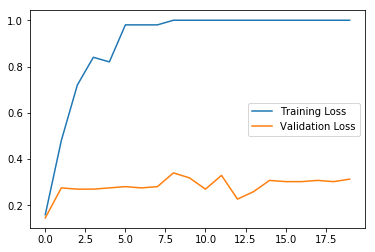

In [194]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    
    train_loss = []
    val_loss = []
    for epoch in range(n_epochs):
        for iteration in range(len(x_train) // batch_size):
            X_batch, y_batch = next_batch(batch_size, x_train, y_train)
            sess.run(training_op, feed_dict ={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch,y: y_batch})
        acc_val = accuracy.eval(feed_dict={X:x_test, y:y_test})
        train_loss.append(acc_train)
        val_loss.append(acc_val)
        print(epoch, "Train Accuracy: ", acc_train, "Val_Accuracy: ", acc_val)
    save_path = saver.save(sess, "/Users/meyern/Downloads/all/my_model_final.ckpt")
    
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(val_loss, label = 'Validation Loss')
    plt.legend()
#     X_test = np.asarray(test, dtype=np.float32)
#     X_test = X_test / 255
    
#     Z = logits.eval(session=sess, feed_dict={X:X_test})
#     y_pred = np.argmax(Z, axis=1)